<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [2]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [4]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [9]:
data[data.sex == 'Female'].age.mean()

36.858230433571627

**3. Какова доля граждан Германии (признак *native-country*)?**

In [15]:
data['native-country'].value_counts(normalize=True)['Germany']

0.0042074874850281012

**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

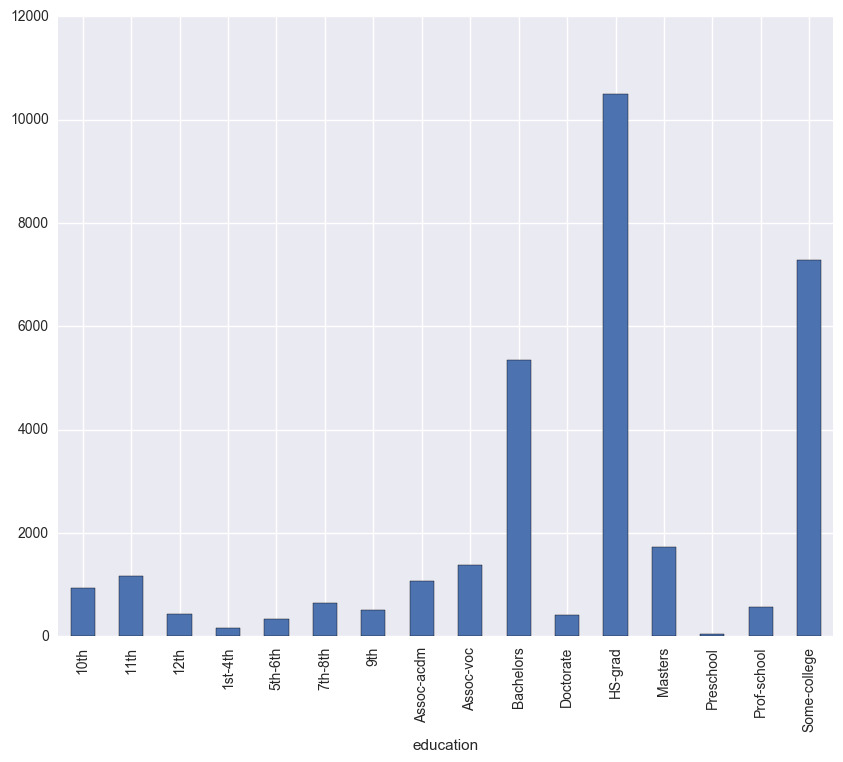

In [17]:
data.groupby('education').size().plot(kind='bar')

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [26]:
data.groupby('salary').agg({'age': ['mean', 'std']})

age           
             mean        std
salary                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028

**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [32]:
high_educations = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

In [33]:
all(data[data['salary'] == '>50K'].education.isin(high_educations))

False

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [34]:
data.groupby(['race', 'sex']).describe()

age  capital-gain  capital-loss  \
race               sex                                                      
Amer-Indian-Eskimo Female count    119.000000    119.000000    119.000000   
                          mean      37.117647    544.605042     14.462185   
                          std       13.114991   2451.591587    157.763811   
                          min       17.000000      0.000000      0.000000   
                          25%       27.000000      0.000000      0.000000   
                          50%       36.000000      0.000000      0.000000   
                          75%       46.000000      0.000000      0.000000   
                          max       80.000000  15024.000000   1721.000000   
                   Male   count    192.000000    192.000000    192.000000   
                          mean      37.208333    675.260417     46.395833   
                          std       12.049563   2929.745443    286.562584   
                          min       17.000000      0.000000      0.000000   
                          25%       28.000000      0.000000      0.000000   
                          50%       35.000000      0.000000      0.000000   
                          75%       45.000000      0.000000      0.000000   
                          max       82.000000  27828.000000   1980.000000   
Asian-Pac-Islander Female count    346.000000    346.000000    346.000000   
                          mean      35.089595    778.436416     50.852601   
                          std       12.300845   7675.228631    296.529225   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       33.000000      0.000000      0.000000   
                          75%       43.750000      0.000000      0.000000   
                          max       75.000000  99999.000000   2258.000000   
                   Male   count    693.000000    693.000000    693.000000   
                          mean      39.073593   1827.813853    120.373737   
                          std       12.883944  10947.525528    472.917697   
                          min       18.000000      0.000000      0.000000   
                          25%       29.000000      0.000000      0.000000   
                          50%       37.000000      0.000000      0.000000   
...                                       ...           ...           ...   
Other              Female std       11.631599   1317.326460    231.796929   
                          min       17.000000      0.000000      0.000000   
                          25%       23.000000      0.000000      0.000000   
                          50%       29.000000      0.000000      0.000000   
                          75%       39.000000      0.000000      0.000000   
                          max       74.000000   7688.000000   1740.000000   
                   Male   count    162.000000    162.000000    162.000000   
                          mean      34.654321   1392.185185     77.746914   
                          std       11.355531  11093.711595    370.986720   
                          min       17.000000      0.000000      0.000000   
                          25%       26.000000      0.000000      0.000000   
                          50%       32.000000      0.000000      0.000000   
                          75%       42.000000      0.000000      0.000000   
                          max       77.000000  99999.000000   2179.000000   
White              Female count   8642.000000   8642.000000   8642.000000   
                          mean      36.811618    573.610391     65.390535   
                          std       14.329093   4763.131649    352.330817   
                          min       17.000000      0.000000      0.000000   
                          25%       25.000000      0.000000      0.000000   
                          50%       35

In [47]:
data.groupby(['race', 'sex']).describe().loc['Amer-Indian-Eskimo', 'Male', 'max'].age

82.0

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married*, остальных считаем холостыми.**

In [50]:
data['is_married'] = data['marital-status'].apply(lambda x: x.startswith('Married'))

In [54]:
data[data['salary'] == '>50K'].is_married.value_counts(normalize=True)

True     0.859074
False    0.140926
Name: is_married, dtype: float64

**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [55]:
data['hours-per-week'].max()

99

In [61]:
len(data[data['hours-per-week'] == data['hours-per-week'].max()])

85

In [58]:
data[data['hours-per-week'] == data['hours-per-week'].max()].salary.value_counts(normalize=True)['>50K']

0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих много и мало (*salary*) для каждой страны (*native-country*).**

In [59]:
data.groupby(['native-country', 'salary']).agg({'hours-per-week': 'mean'})

hours-per-week
native-country             salary                
?                          <=50K        40.164760
                           >50K         45.547945
Cambodia                   <=50K        41.416667
                           >50K         40.000000
Canada                     <=50K        37.914634
                           >50K         45.641026
China                      <=50K        37.381818
                           >50K         38.900000
Columbia                   <=50K        38.684211
                           >50K         50.000000
Cuba                       <=50K        37.985714
                           >50K         42.440000
Dominican-Republic         <=50K        42.338235
                           >50K         47.000000
Ecuador                    <=50K        38.041667
                           >50K         48.750000
El-Salvador                <=50K        36.030928
                           >50K         45.000000
England                    <=50K        40.483333
                           >50K         44.533333
France                     <=50K        41.058824
                           >50K         50.750000
Germany                    <=50K        39.139785
                           >50K         44.977273
Greece                     <=50K        41.809524
                           >50K         50.625000
Guatemala                  <=50K        39.360656
                           >50K         36.666667
Haiti                      <=50K        36.325000
                           >50K         42.750000
...                                           ...
Mexico                     >50K         46.575758
Nicaragua                  <=50K        36.093750
                           >50K         37.500000
Outlying-US(Guam-USVI-etc) <=50K        41.857143
Peru                       <=50K        35.068966
                           >50K         40.000000
Philippines                <=50K        38.065693
                           >50K         43.032787
Poland                     <=50K        38.166667
                           >50K         39.000000
Portugal                   <=50K        41.939394
                           >50K         41.500000
Puerto-Rico                <=50K        38.470588
                           >50K         39.416667
Scotland                   <=50K        39.444444
                           >50K         46.666667
South                      <=50K        40.156250
                           >50K         51.437500
Taiwan                     <=50K        33.774194
                           >50K         46.800000
Thailand                   <=50K        42.866667
                           >50K         58.333333
Trinadad&Tobago            <=50K        37.058824
                           >50K         40.000000
United-States              <=50K        38.799127
                           >50K         45.505369
Vietnam                    <=50K        37.193548
                           >50K         39.200000
Yugoslavia                 <=50K        41.600000
                           >50K         49.500000

[82 rows x 1 columns]

In [62]:
data.groupby(['native-country', 'salary']).agg({'hours-per-week': 'mean'}).loc['Japan']

,hours-per-week
salary,
<=50K,41.000000
>50K,47.958333
